In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

(70, 89)


/home/ekai2/anaconda3/envs/ss_ndvi/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


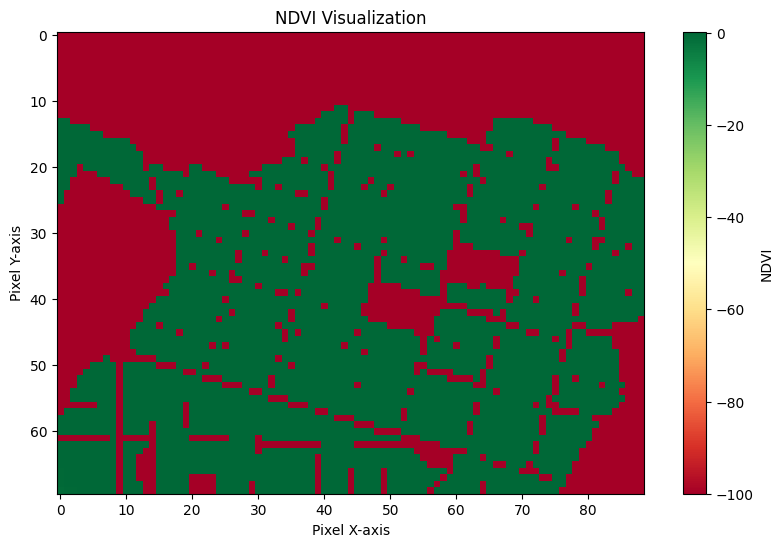

In [9]:
# Open the .tif file
with rasterio.open("/mnt/data1tb/SAR2NDVI/output/test_tif/daiki_20170506_ndvi.tif") as src:
    # Read Red and NIR bands (assuming Red is band 1 and NIR is band 2; adjust if different)
    ndvi = src.read(1).astype('float32')

# Handle division by zero errors
ndvi = np.nan_to_num(ndvi, nan=0.0, posinf=0.0, neginf=0.0)
print(ndvi.shape)

# Visualize the NDVI
plt.figure(figsize=(10, 6))
plt.imshow(ndvi, cmap='RdYlGn')  # Use a colormap that represents vegetation well
plt.colorbar(label="NDVI")
plt.title("NDVI Visualization")
plt.xlabel("Pixel X-axis")
plt.ylabel("Pixel Y-axis")
plt.show()